# Star Type Predictor | Logistic Regression using Scikit-Learn

---

## Aim
- Using sklearn's Logistic Regression implement the Logistic Regression to train the model to classify different types of stars
- Create web application using FastAPI for backend and Streamlit for Frontend

<center> <img src='https://camo.githubusercontent.com/c9e50b286b169461e184f4bcdc6f1dbf80690dbb55775a541a7b3fb64ef5090c/68747470733a2f2f692e70696e696d672e636f6d2f6f726967696e616c732f38342f35352f31342f38343535313431386637616439316334376437353034366462376334323939332e706e67' width=50%/>

## In this Session we will
1. Understand the Problem Statement
2. Import Libraries
3. Read and Explore the Dataset using Pandas
4. Perform Train-Validation Split (Test on Real Data)
5. Create Pipeline (Scaler and Classifier)
6. Training and Predictions
7. Testing
8. Download the pipeline

## 1) Dataset

[Click here](https://drive.google.com/uc?id=12oc8SOpsbktDzmBXXZT3FNxKhCUQA_DA) to download it



## 2) Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3) Read and Explore the CSV Dataset of Star Type

In [7]:
# Set the csv file path
csv_path = '/content/star_type_.csv'


# Read this csv and convert it to dataframe using pandas
df = pd.read_csv(csv_path)

In [8]:
# Explore the basic information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


- There are total of 4 input features (Temp, Lum wrt Sun, Rad wrt Sun, Abs Mag) whose data type is numerical (int or float).
- There is one target (Star type) whose data type is object (string per data instance)
- Total of 240 entries (data instances) and none of the values are missing in the dataset.

In [9]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Brown Dwarf
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Supergiant
236,30839,834042.000000,1194.0000,-10.63,Supergiant
237,8829,537493.000000,1423.0000,-10.73,Supergiant
238,9235,404940.000000,1112.0000,-11.23,Supergiant


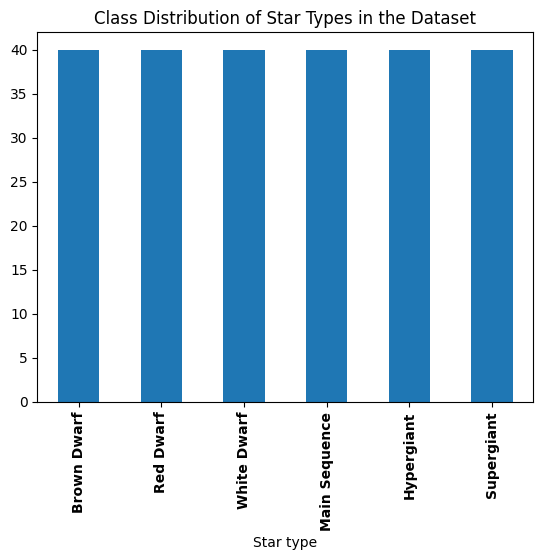

In [10]:
# Plot unique classes in Star type column
df['Star type'].value_counts().plot(kind='bar')
plt.xticks(weight='bold')
plt.title('Class Distribution of Star Types in the Dataset')
plt.savefig('ClassDistribution.png')
plt.show()

- Using barplot we can see that each class has 40 samples
- This is perfectly balanced data
- Hence, we can use accuracy as our evaluation metric

In [11]:
# By default sklearn's Logistic Regression takes care about encoding
# They use Label Encoding for SAG solver

## 4) Splitting the data into training and validation set

- In real life you should have abundent dataset
- One should be used for training (train set)
- One should be used for validation (val set)
- One should be used for testing (unseen set)
- Rightnow, we just have one dataset thus we need to manually split it
- This is only to be done when you don't have more than one dataset for the same data.
- This splitting is called as train-val split that you can perform manually or using sklearn's train_test_split function
- Then for unseen data you can come up with some way to have some more dataset which can be used for testing.
- In our case, we will take data of stars from online resources for testing.

In [13]:
# First prepare X (input features dataframe) and y (target data series)
X = df.drop(['Star type'], axis=1) # axis = 0 is for row and axis = 1 is for col in 2D data
y = df['Star type'] # this is data series for targets in the orignal df

In [14]:
# Cross check the shapes
print(f'The shape of input features:- {X.shape}')
print(f'The shape of targets:- {y.shape}')

The shape of input features:- (240, 4)
The shape of targets:- (240,)


In [15]:
# Split original data into train-val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,                 # input features (array-like)
                                                  y,                 # target data (array-like)
                                                  test_size=0.2,     # validation split size in percentage 20%
                                                  shuffle=True,      # Shuffle the dataset
                                                  random_state=42)   # Always shuffle in the same pattern


In [16]:
# Check the shapes of X_train, y_train, X_val, and y_val
print(f'Shape of X_train:- {X_train.shape}')
print(f'Shape of y_train:- {y_train.shape}')
print()
print(f'Shape of X_val:- {X_val.shape}')
print(f'Shape of y_val:- {y_val.shape}')

Shape of X_train:- (192, 4)
Shape of y_train:- (192,)

Shape of X_val:- (48, 4)
Shape of y_val:- (48,)


## 5) Create Sklearn Pipeline to perform data processing and classification

- This will help you to avoid a problem like data leakage.
- How? Check the next cell.

In [17]:
# Assume we are talking about standard scaling
'''
z = (x - u)/s

Remember, there are two things while processing your data
1. fit - Responsible to calculate information that will be used during transformation
2. transform - Responsible to transform the data using the values stored during the fit process

Also remember,
1. We use fit only on training set
2. We always use transform on val and test (unseen) set

Why? Why cant we use fit on val or test set?
- Assume 100 is a value that you have in one of the row of col1 in dataset
- Now if you are using standard scaler, when you use fit it will calcuate mean and std dev
- When you use transform using that mean and std dev you convert 100 to let's say 0.1
- Now imagine in validation set, you again used fit that will calculate mean and std dev wrt to val set
- So as the mean and std dev changed, if in val set you have 100, it will not be changed to 0.1
- Thus, model will be confused! In training you told model see 100 means 0.1
- Now during val or test u tell model that 100 means something else, so model will not give correct solutions
- THUS, REMEMBER TO ALWAYS USE FIT FOR TRAINING SO THAT SAME TRAIN SET IS USED FOR VAL AND TEST SET ALSO

So how does scaler know if it should use mean and std dev of train and not test or val set?
- That's why we have fit and transform
- Always apply fit for train
- Then transform on train
- Then use the fitted scaler (mean and std dev from train set) to transform the val and test set

If this confusing, sklearn has come up with a better practice.
- Pipeline
- In pipeline, use fit if training data is passed and use predict for val or test data
- The fit will automatically implement fit + transform
- predict will implement automatically only transform
- So the need of doing it explicitly is eleminated
'''

"\nz = (x - u)/s\n\nRemember, there are two things while processing your data\n1. fit - Responsible to calculate information that will be used during transformation\n2. transform - Responsible to transform the data using the values stored during the fit process\n\nAlso remember,\n1. We use fit only on training set\n2. We always use transform on val and test (unseen) set\n\nWhy? Why cant we use fit on val or test set?\n- Assume 100 is a value that you have in one of the row of col1 in dataset\n- Now if you are using standard scaler, when you use fit it will calcuate mean and std dev\n- When you use transform using that mean and std dev you convert 100 to let's say 0.1\n- Now imagine in validation set, you again used fit that will calculate mean and std dev wrt to val set\n- So as the mean and std dev changed, if in val set you have 100, it will not be changed to 0.1\n- Thus, model will be confused! In training you told model see 100 means 0.1\n- Now during val or test u tell model that 

In [18]:
# Imports top create pipeline for scaling and classifier steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [19]:
# Pipeline is used to store the steps to be implemented on the dataset

# Create list of steps where each element is a tuple (name_of_step, init of that step)
steps = [
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2',
                                      tol=1e-13,
                                      random_state=42,
                                      solver='sag',
                                      max_iter=5000))
]

pipeline = Pipeline(steps)

In [20]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

## 6) Train and evaluate the pipeline
- `fit()`
  - Scaler:- it will calculate mean and std
  - Sclaer:- it will then transform
  - classifier:- it will train the model

- `predict()`
  - Scaler:- only transform is used
  - classifier:- it uses the values of weights and bias to get prediction without training

In [21]:
# Fit the pipeline
pipeline.fit(X_train, y_train) # remember to pass only training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

In [22]:
# Check the mean and variance (std square is variance) values in the scaler
pipeline['scaler'].mean_
pipeline['scaler'].var_

array([8.71165318e+07, 2.82611058e+10, 2.43158486e+05, 1.07985733e+02])

In [23]:
# Check the weights and bias for logistic regression
pipeline['classifier'].coef_
pipeline['classifier'].intercept_

array([-3.01460666,  0.9049343 ,  1.11128809,  0.24861336,  0.37315862,
        0.37661228])

In [24]:
# We used multinomial approach hence the shape is (6,4)

"""
How??

1) Logit calculation ==> Z1, Z2, Z3, Z4, Z5, Z6
2) Softmax Probs ==> P(Z1), P(Z2), P(Z3), P(Z4), P(Z5), P(Z6)

Note that, here as we have 6 different equations. Each has their own 4 weights and 1 bias
Thus, the shape (6, 4) tells us that there are 4 weights per equation. As 6 equations, total 24 values in weight matrix
"""

'\nHow??\n\n1) Logit calculation ==> Z1, Z2, Z3, Z4, Z5, Z6\n2) Softmax Probs ==> P(Z1), P(Z2), P(Z3), P(Z4), P(Z5), P(Z6)\n\nNote that, here as we have 6 different equations. Each has their own 4 weights and 1 bias\nThus, the shape (6, 4) tells us that there are 4 weights per equation. As 6 equations, total 24 values in weight matrix\n'

In [25]:
# Get classification report on training data
from sklearn.metrics import classification_report

# Predicted on Train set
y_pred_train = pipeline.predict(X_train)

# Convert the true y values to arrays
y_train = y_train.values

# Classification report
print('Training Classification Report:-')
print(classification_report(y_train, y_pred_train))

Training Classification Report:-
               precision    recall  f1-score   support

  Brown Dwarf       0.94      1.00      0.97        32
   Hypergiant       0.97      0.94      0.95        32
Main Sequence       0.93      0.88      0.90        32
    Red Dwarf       0.91      0.94      0.93        33
   Supergiant       1.00      1.00      1.00        29
  White Dwarf       1.00      1.00      1.00        34

     accuracy                           0.96       192
    macro avg       0.96      0.96      0.96       192
 weighted avg       0.96      0.96      0.96       192



In [26]:
# Predicted on Val set
y_pred_val = pipeline.predict(X_val)

# Convert the true y values to arrays
y_val = y_val.values

# Classification report
print('Validation Classification Report:-')
print(classification_report(y_val, y_pred_val))

Validation Classification Report:-
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       0.89      1.00      0.94         8
Main Sequence       1.00      0.75      0.86         8
    Red Dwarf       0.88      1.00      0.93         7
   Supergiant       1.00      1.00      1.00        11
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.96        48
    macro avg       0.96      0.96      0.96        48
 weighted avg       0.96      0.96      0.96        48



- The accuracies for training and validation is 96%
- Hence, there is no over or underfitting
- Thus, we can trust this accuracy and say that our model is 96% accurate!
- This should now reflect on the unseen dataset
- Most of the times the model should correctly predict the class based on input star properties

## 7) Time to test on unseen data
- You can use any trust worthy web services to get information of stars
- I will use wikipedia for now

In [27]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type'],
      dtype='object')

In [28]:
# Create data for testing per star

# Details of star
name = 'Polaris'
y_true = 'Supergiant'

star_dict = {
    'Temperature (K)' : 6015,
    'Luminosity(L/Lo)' : 1260,
    'Radius(R/Ro)' : 40,
    'Absolute magnitude(Mv)' : -3.6
}

test_df = pd.DataFrame(star_dict, index=[0])

y_pred = pipeline.predict(test_df)
y_pred_prob = pipeline.predict_proba(test_df)
print(y_pred_prob)

print()

# Print the outputs
print(f'For {name} Star:-')
print(f'True Type:- {y_true}')
print(f'Predicted Type:- {y_pred[0]}')

[[6.23608974e-05 1.33320201e-01 7.73284249e-01 7.92828917e-02
  1.10845320e-02 2.96576510e-03]]

For Polaris Star:-
True Type:- Supergiant
Predicted Type:- Main Sequence


In [29]:
pipeline['classifier'].classes_

array(['Brown Dwarf', 'Hypergiant', 'Main Sequence', 'Red Dwarf',
       'Supergiant', 'White Dwarf'], dtype=object)

# Download the fitted pipeline

In [30]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

In [32]:
# Download the fitted pipeline using joblib library
from joblib import dump
dump(pipeline, 'pipeline_star_type_pred.joblib')

['pipeline_star_type_pred.joblib']